<a href="https://colab.research.google.com/github/Fernando21854/NeuralNetwork/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")

#extract the values of the 'Petal length cm' and 'width cm' and then store them in a NumPy array 
X = iris[['PetalLengthCm', 'PetalWidthCm']].values

#map the species from strings to numercical labels 
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
#store in numpy array called 'y'
y = iris['Species'].map(species_mapping).values

iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
#split the dataset into training and testing sets. test_size to 30% and 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#create an instance of the standard scaler to standardize features 
scaler = StandardScaler()
#fit the data by standardizing
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Create Perceptron model 1e-3 is the stopping criterion
model = Perceptron(tol=1e-3, random_state=43)

# Train the model using the training set
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 0.9555555555555556


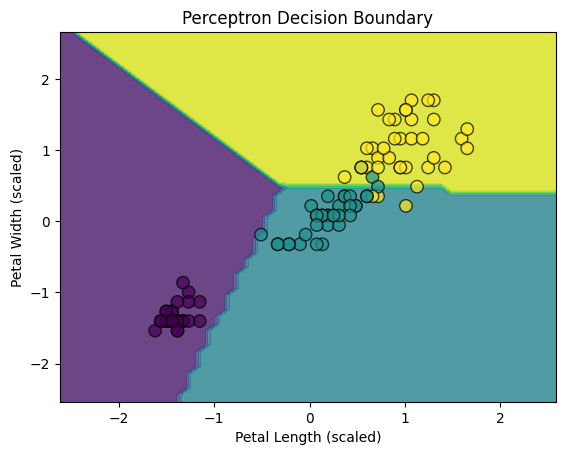

In [46]:
#define a function that takes in the features x, y, and model
def plot_decision_boundary(X, y, model):
    #calculating min and max values of first feature (petal length)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #calculate the min and max values of the second feature (petal width) add margin of 1 unit for visualization
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #this grid will be used to evaluate the model predictions for every point on the grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    #use train model to predict labels for points on the grid. Using np.c function it will concatenate the x and y coordinates into a single array of points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    #reshape the predictions array z to have the same shape as xx and yy mesh grids
    Z = Z.reshape(xx.shape)
    #create a 'filled' contour plot to visualize the decision boundary, alpha makes color transparent
    plt.contourf(xx, yy, Z, alpha=0.8)
    #k for black edges, 'o' for circle markers, and's' to 80 for the marker size, and alpha for transperency
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, alpha=0.7)

    #set x and y labels
    plt.xlabel("Petal Length (scaled)")
    plt.ylabel("Petal Width (scaled)")
    #set title of plot
    plt.title("Perceptron Decision Boundary")

    plt.show()

plot_decision_boundary(X_train, y_train, model)


Accuracy of the SVM model: 1.0


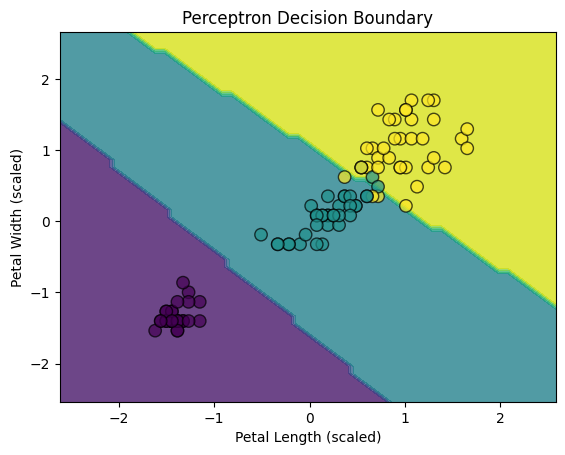

In [47]:
from sklearn.svm import SVC

# Create an SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Train the model using the training set
svm_model.fit(X_train, y_train)

# Test the accuracy of the model on the test set
svm_accuracy = svm_model.score(X_test, y_test)
print("Accuracy of the SVM model:", svm_accuracy)

# Visualize the decision boundary of the SVM model
plot_decision_boundary(X_train, y_train, svm_model)

Did this just for fun to see how accurate using SVM is
